# A/B Testing and Hypotheses Prioritization 

## Introducaion

In this project, we will analyze the data of a big online store. The store wants to boost its revenues, so the marketing department compiled some hypotheses that may help accomplish this objective. The main goal of this project is to prioritize the hypotheses and analyze the results of the A/B test. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import random
from matplotlib import pyplot

In [2]:
try:
    hypo = pd.read_csv('hypotheses_us.csv', sep = ';')
    orders = pd.read_csv('orders_us.csv')
    visits = pd.read_csv('visits_us.csv')
except:
    hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')    

## Part 1. Prioritizing Hypotheses

* **Apply the ICE framework to prioritize hypotheses. Sort them in
descending order of priority.**


In [3]:
hypo

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


First, let's make the name of the column with lowercase to make things easier.

In [4]:
hypo.columns=hypo.columns.str.lower()
hypo_new = hypo

In [5]:
hypo_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Great!

Let's calculate the ICE metric.

In [6]:
hypo_new['ice'] = (hypo_new['impact']*hypo_new['confidence'])/hypo_new['effort']
hypo_sorted = hypo_new[['hypothesis', 'ice']].sort_values(by='ice', ascending = False)
hypo_sorted

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Now let's calculate the RICE metric.

In [7]:
hypo_new['rice'] = (hypo_new['reach']*hypo_new['impact']*hypo_new['confidence'])/hypo_new['effort']
hypo_sorted_2 = hypo_new[['hypothesis', 'rice']].sort_values(by='rice', ascending = False)
hypo_sorted_2

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


So here we see that the results of the hypotheses vary in each metric. Hypotheses number 8,0 and 7 are the leaders for the ice metric, while hypotheses 7,2, and 0 are the leaders for the rice metric. Hypothesis number 8 got a much lower score in the rice metric than in the ice metric where it got the higher score. It seems that hypotheses 7 and 0 are the most promising and 'safe' hypotheses to test - they are in the top 3 both in the ice and rice metrics. 

## Part 2. A/B Test Analysis

First let's check the data sets.

**orders**

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


Since we have only 2 categories in the **'group'** column, let's change it's data type  from object to category to make better use of the memory usage.

In [10]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [11]:
orders['group'] = orders['group'].astype('category')

Now let's also change the data type of the **'date'** column from object to date type. 

In [12]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [14]:
orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.9 KB


Sweet!

We managed to decrease the memory usage from 174.3 KB to 38.9 KB. 👌

**visits**

In [15]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


Here also, let's change the data type of the **'group'** column from object to category.

In [17]:
visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [18]:
visits['group'] = visits['group'].astype('category')

Now also let's change the data type to the **'date'** column from object to date type as we did for orders.

In [19]:
visits['date'] = pd.to_datetime(visits['date'], format = '%Y-%m-%d')

In [20]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.4 KB


Nice!

We managed to decrease the memory usage from 8.2 KB to  1.4 KB. 🤘

* **1. Graph cumulative revenue by group. Make conclusions and conjectures.**

First, let's divide the groups.

In [22]:
orders_A = orders.query('group == "A"')
orders_A.head()

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A


In [23]:
orders_B = orders.query('group == "B"')
orders_B.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


Great! 

Now let's calculate the cumulative revenue for each group.

**Group A**

In [24]:
orders_A_date_groupd = orders_A.groupby('date').agg({'visitorId':'nunique', 'revenue':'sum'}).reset_index()
orders_A_date_groupd['cumul_revenue_a'] = orders_A_date_groupd['revenue'].cumsum()
orders_A_date_groupd.columns = ['date', 'buyers_a', 'revenue_a', 'cumul_revenue_a']
orders_A_date_groupd.head()

,date,buyers_a,revenue_a,cumul_revenue_a
0,2019-08-01,20,2356.8,2356.8
1,2019-08-02,19,1503.5,3860.3
2,2019-08-03,24,1815.2,5675.5
3,2019-08-04,15,1146.6,6822.1
4,2019-08-05,25,1988.1,8810.2


**Group B**

In [25]:
orders_B_date_groupd = orders_B.groupby('date').agg({'visitorId':'nunique', 'revenue':'sum'}).reset_index()
orders_B_date_groupd['cumul_revenue_b'] = orders_B_date_groupd['revenue'].cumsum()
orders_B_date_groupd.columns = ['date', 'buyers_b', 'revenue_b', 'cumul_revenue_b']
orders_B_date_groupd.head()

,date,buyers_b,revenue_b,cumul_revenue_b
0,2019-08-01,20,1620.0,1620.0
1,2019-08-02,23,2623.8,4243.8
2,2019-08-03,16,1806.8,6050.6
3,2019-08-04,16,1717.3,7767.9
4,2019-08-05,23,1495.0,9262.9


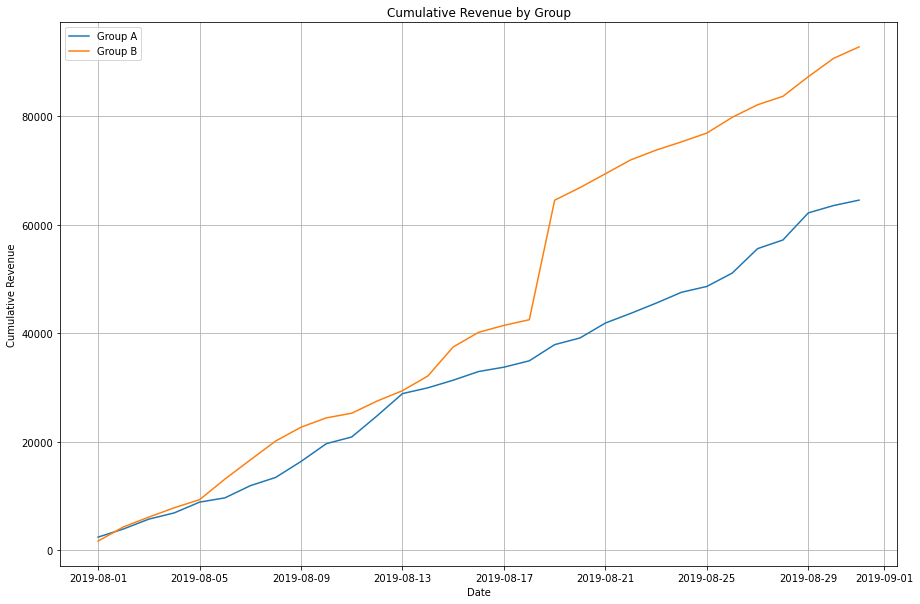

In [26]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(orders_A_date_groupd['date'], orders_A_date_groupd['cumul_revenue_a'], label='Group A')
plt.plot(orders_B_date_groupd['date'], orders_B_date_groupd['cumul_revenue_b'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group')
plt.legend()
plt.grid()
plt.show()

We see that group B has higher cumulative revenue than group A, so we can say that the results of group B is better than group a, and that group B is more profitable than group A.

A reason for the sudden rise in the cumulative revenue can be big and abnormal orders that spiked the revenue. Meaning orders that are outliers, and cause the cumulative revenue to rise in one moment. 

* **2. Graph cumulative average order size by group. Make conclusions and conjectures.**

**Group A**

In [27]:
orders_A_date_purchases = orders_A.groupby('date').agg({'visitorId' :'nunique', 'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_A_date_purchases.columns = ['date', 'buyers_a', 'purcheses_a', 'revenue_a']
orders_A_date_purchases.head()

,date,buyers_a,purcheses_a,revenue_a
0,2019-08-01,20,24,2356.8
1,2019-08-02,19,20,1503.5
2,2019-08-03,24,24,1815.2
3,2019-08-04,15,16,1146.6
4,2019-08-05,25,25,1988.1


In [28]:
orders_A_date_purchases['cumul_rev_a'] = orders_A_date_purchases['revenue_a'].cumsum()
orders_A_date_purchases['cumul_purch_a'] = orders_A_date_purchases['purcheses_a'].cumsum()
orders_A_date_purchases['cumul_avr_a'] = orders_A_date_purchases['cumul_rev_a']/orders_A_date_purchases['cumul_purch_a']
orders_A_date_purchases.head()

,date,buyers_a,purcheses_a,revenue_a,cumul_rev_a,cumul_purch_a,cumul_avr_a
0,2019-08-01,20,24,2356.8,2356.8,24,98.200000
1,2019-08-02,19,20,1503.5,3860.3,44,87.734091
2,2019-08-03,24,24,1815.2,5675.5,68,83.463235
3,2019-08-04,15,16,1146.6,6822.1,84,81.215476
4,2019-08-05,25,25,1988.1,8810.2,109,80.827523


**Group B**

In [29]:
orders_B_date_purchases = orders_B.groupby('date').agg({'visitorId' :'nunique', 'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_B_date_purchases.columns = ['date', 'buyers_b', 'purcheses_b', 'revenue_b']
orders_B_date_purchases.head()

,date,buyers_b,purcheses_b,revenue_b
0,2019-08-01,20,21,1620.0
1,2019-08-02,23,24,2623.8
2,2019-08-03,16,16,1806.8
3,2019-08-04,16,17,1717.3
4,2019-08-05,23,23,1495.0


In [30]:
orders_B_date_purchases['cumul_rev_b'] = orders_B_date_purchases['revenue_b'].cumsum()
orders_B_date_purchases['cumul_purch_b'] = orders_B_date_purchases['purcheses_b'].cumsum()
orders_B_date_purchases['cumul_avr_b'] = orders_B_date_purchases['cumul_rev_b']/orders_B_date_purchases['cumul_purch_b']
orders_B_date_purchases.head()

,date,buyers_b,purcheses_b,revenue_b,cumul_rev_b,cumul_purch_b,cumul_avr_b
0,2019-08-01,20,21,1620.0,1620.0,21,77.142857
1,2019-08-02,23,24,2623.8,4243.8,45,94.306667
2,2019-08-03,16,16,1806.8,6050.6,61,99.190164
3,2019-08-04,16,17,1717.3,7767.9,78,99.588462
4,2019-08-05,23,23,1495.0,9262.9,101,91.711881


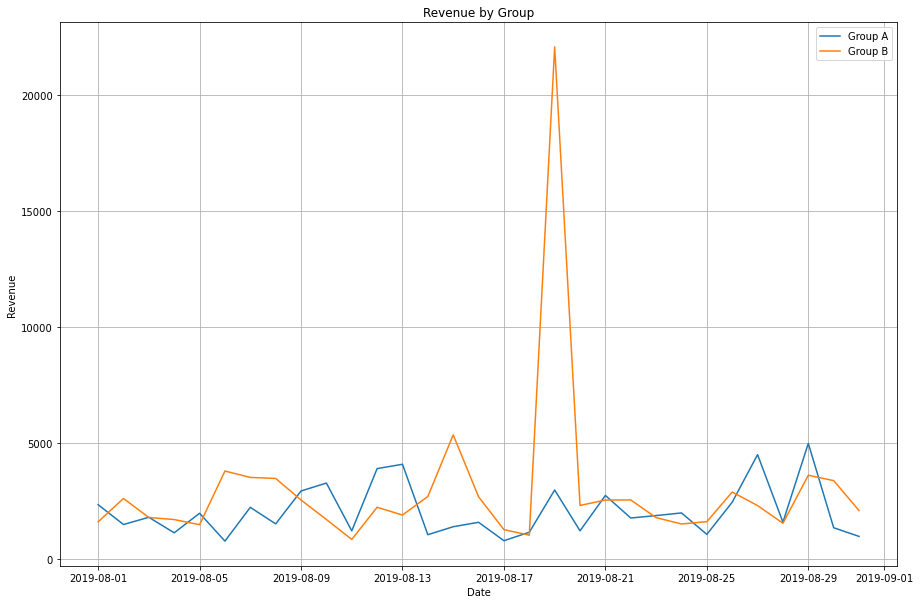

In [31]:
plt.plot(orders_A_date_purchases['date'], orders_A_date_purchases['revenue_a'], label='Group A')
plt.plot(orders_B_date_purchases['date'], orders_B_date_purchases['revenue_b'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue by Group')
plt.legend()
plt.grid()
plt.show()

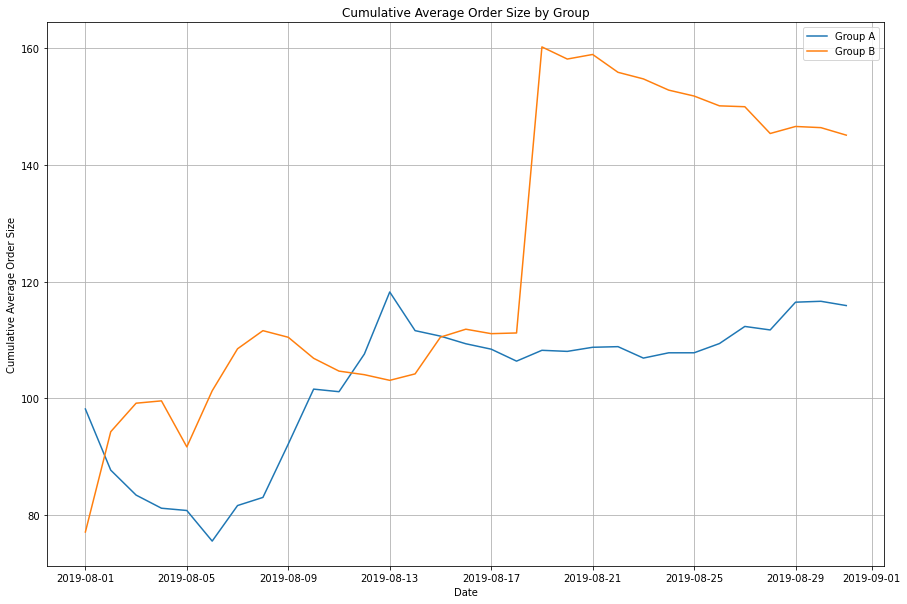

In [32]:
plt.plot(orders_A_date_purchases['date'], orders_A_date_purchases['cumul_avr_a'], label='Group A')
plt.plot(orders_B_date_purchases['date'], orders_B_date_purchases['cumul_avr_b'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.title('Cumulative Average Order Size by Group')
plt.legend()
plt.grid()
plt.show()

In general, we see the same pattern that we saw earlier, the results of group B are better than group A. We see that around the 17th of August, there was a spike in the revenues - it's pretty abnormal. Maybe someone did one big purchase in the summertime. 

* **3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**

In [33]:
orders_A_date_purchases.head()

,date,buyers_a,purcheses_a,revenue_a,cumul_rev_a,cumul_purch_a,cumul_avr_a
0,2019-08-01,20,24,2356.8,2356.8,24,98.200000
1,2019-08-02,19,20,1503.5,3860.3,44,87.734091
2,2019-08-03,24,24,1815.2,5675.5,68,83.463235
3,2019-08-04,15,16,1146.6,6822.1,84,81.215476
4,2019-08-05,25,25,1988.1,8810.2,109,80.827523


Let's merge the data of the 2 groups and graph the relative difference.

In [34]:
merged_groupes_cumul = orders_A_date_purchases.merge(orders_B_date_purchases, left_on='date', right_on='date', how='left')
merged_groupes_cumul.head()

,date,buyers_a,purcheses_a,revenue_a,cumul_rev_a,cumul_purch_a,cumul_avr_a,buyers_b,purcheses_b,revenue_b,cumul_rev_b,cumul_purch_b,cumul_avr_b
0,2019-08-01,20,24,2356.8,2356.8,24,98.200000,20,21,1620.0,1620.0,21,77.142857
1,2019-08-02,19,20,1503.5,3860.3,44,87.734091,23,24,2623.8,4243.8,45,94.306667
2,2019-08-03,24,24,1815.2,5675.5,68,83.463235,16,16,1806.8,6050.6,61,99.190164
3,2019-08-04,15,16,1146.6,6822.1,84,81.215476,16,17,1717.3,7767.9,78,99.588462
4,2019-08-05,25,25,1988.1,8810.2,109,80.827523,23,23,1495.0,9262.9,101,91.711881


Now let's plot a relative difference graph.

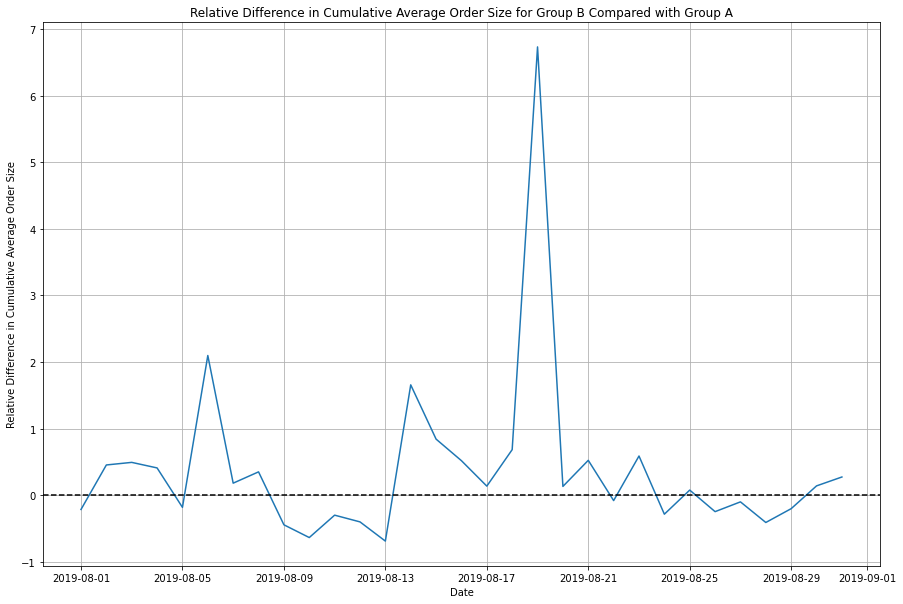

In [35]:
plt.plot(merged_groupes_cumul['date'], (merged_groupes_cumul['revenue_b']/merged_groupes_cumul['purcheses_b'])/(merged_groupes_cumul['revenue_a']/merged_groupes_cumul['purcheses_a'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Date')
plt.ylabel('Relative Difference in Cumulative Average Order Size')
plt.title('Relative Difference in Cumulative Average Order Size for Group B Compared with Group A')
plt.grid()
plt.show()

We see here that at several points the segments spike. As we suspected earlier, this means that there must be big orders in group B. In general we see that group B has better revenue than group A.

* **4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**

In [36]:
orders_A.head()

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A


In [37]:
orders_B.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


First, let's divide the 2 groups for the visits data set.

In [38]:
visits_A = visits.query('group == "A"')
visits_A.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [39]:
visits_B = visits.query('group == "B"')
visits_B.head()

,date,group,visits
31,2019-08-01,B,713
32,2019-08-02,B,581
33,2019-08-03,B,509
34,2019-08-04,B,770
35,2019-08-05,B,707


Now we will create table with the number of orders for each day and merge these tables to find the needed conversion rate.

In [40]:
num_orders_A = orders_A.groupby('date')['transactionId'].count().reset_index()
num_orders_A.head()

,date,transactionId
0,2019-08-01,24
1,2019-08-02,20
2,2019-08-03,24
3,2019-08-04,16
4,2019-08-05,25


In [41]:
num_orders_B = orders_B.groupby('date')['transactionId'].count().reset_index()
num_orders_B.head()

,date,transactionId
0,2019-08-01,21
1,2019-08-02,24
2,2019-08-03,16
3,2019-08-04,17
4,2019-08-05,23


Now let's merge them by date.

In [42]:
num_orders_A = num_orders_A.merge(visits_A, on = 'date', how = 'left')
num_orders_A.columns = ['date', 'orders_A', 'group_A', 'visits_A']
num_orders_A.head()

,date,orders_A,group_A,visits_A
0,2019-08-01,24,A,719
1,2019-08-02,20,A,619
2,2019-08-03,24,A,507
3,2019-08-04,16,A,717
4,2019-08-05,25,A,756


In [43]:
num_orders_B = num_orders_B.merge(visits_B, on = 'date', how = 'left')
num_orders_B.columns = ['date', 'orders_B', 'group_B', 'visits_B']
num_orders_B.head()

,date,orders_B,group_B,visits_B
0,2019-08-01,21,B,713
1,2019-08-02,24,B,581
2,2019-08-03,16,B,509
3,2019-08-04,17,B,770
4,2019-08-05,23,B,707


In [44]:
num_orders_A['conversion_A'] = num_orders_A['orders_A'] / num_orders_A['visits_A']
num_orders_B['conversion_B'] = num_orders_B['orders_B'] / num_orders_B['visits_B']

In [45]:
num_orders_A.head()

,date,orders_A,group_A,visits_A,conversion_A
0,2019-08-01,24,A,719,0.033380
1,2019-08-02,20,A,619,0.032310
2,2019-08-03,24,A,507,0.047337
3,2019-08-04,16,A,717,0.022315
4,2019-08-05,25,A,756,0.033069


In [46]:
num_orders_B.head()

,date,orders_B,group_B,visits_B,conversion_B
0,2019-08-01,21,B,713,0.029453
1,2019-08-02,24,B,581,0.041308
2,2019-08-03,16,B,509,0.031434
3,2019-08-04,17,B,770,0.022078
4,2019-08-05,23,B,707,0.032532


Now let's plot the conversion rate for each group.

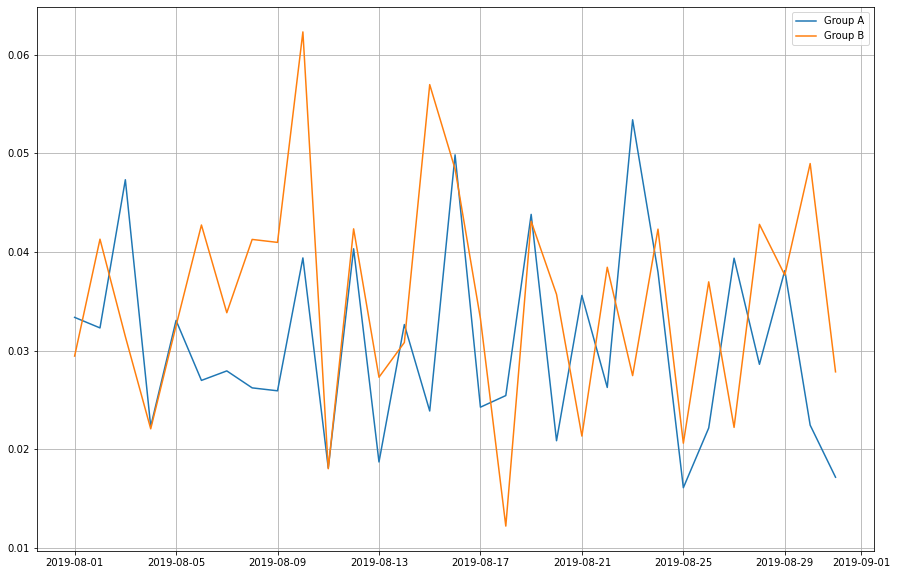

In [47]:
plt.plot(num_orders_A['date'], num_orders_A['conversion_A'], label='Group A')
plt.plot(num_orders_B['date'], num_orders_B['conversion_B'], label='Group B')
plt.legend()
plt.grid()
plt.show()

Let's calculate the overall conversion rate for each group.

In [48]:
 num_orders_A['orders_A'].sum() / num_orders_A['visits_A'].sum()

0.029728864218616567

In [49]:
 num_orders_B['orders_B'].sum() / num_orders_B['visits_B'].sum()

0.033833791499259885

Let's plot relative difference graph for the cumulative conversion rates

In [50]:
merged_cumul_conversion = num_orders_A.merge(num_orders_B, on = 'date', how = 'left')
merged_cumul_conversion.head()

,date,orders_A,group_A,visits_A,conversion_A,orders_B,group_B,visits_B,conversion_B
0,2019-08-01,24,A,719,0.033380,21,B,713,0.029453
1,2019-08-02,20,A,619,0.032310,24,B,581,0.041308
2,2019-08-03,24,A,507,0.047337,16,B,509,0.031434
3,2019-08-04,16,A,717,0.022315,17,B,770,0.022078
4,2019-08-05,25,A,756,0.033069,23,B,707,0.032532


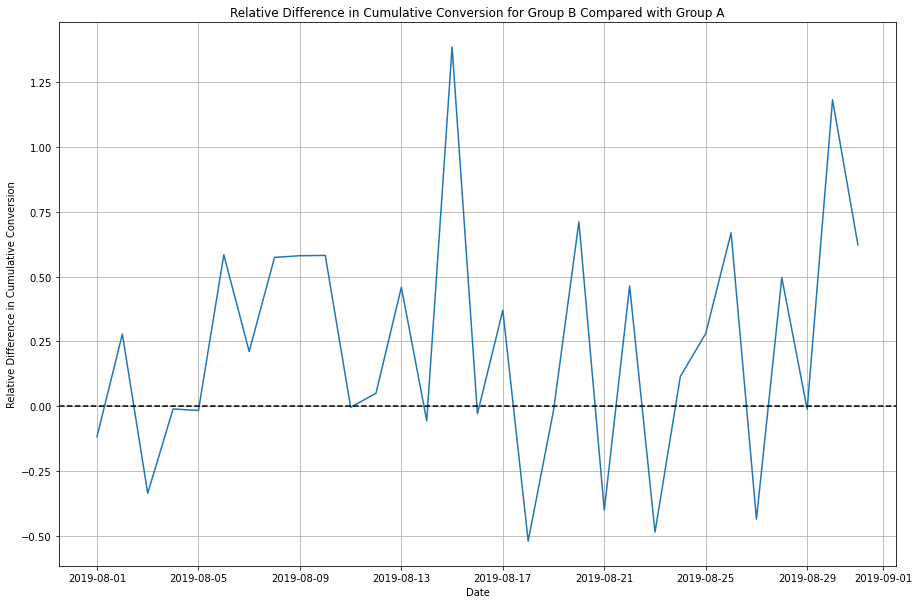

In [51]:
plt.plot(merged_groupes_cumul['date'], (merged_cumul_conversion['orders_B']/merged_cumul_conversion['visits_B'])/(merged_cumul_conversion['orders_A']/merged_cumul_conversion['visits_A'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Date')
plt.ylabel('Relative Difference in Cumulative Conversion')
plt.title('Relative Difference in Cumulative Conversion for Group B Compared with Group A')
plt.grid()
plt.show()

Wow! 

This graph has a lot of spikes - the data is very unstable. Once again as we suspected, we have outliers of users that placed abnormally large numbers of orders. 

In general, we see that most of the time the graph is above zero, which means that the conversion rate of group B is better compared to group A. 

* **5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

In [52]:
orders_per_user = orders.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user.columns = ['user', 'orders']
orders_per_user.head()

,user,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


The x values of the scatter plot will be the number of users.

In [53]:
x_values = pd.Series(range(0,len(orders_per_user)))

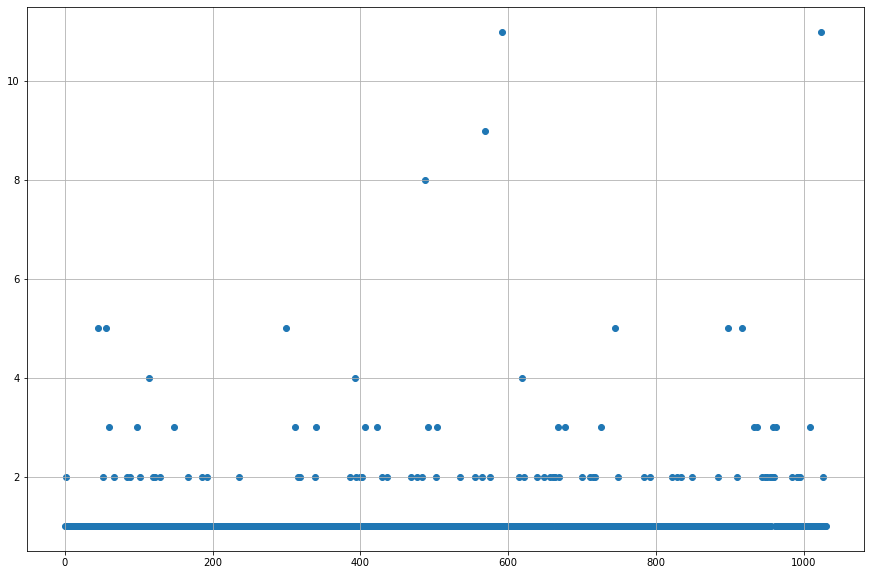

In [54]:
plt.scatter(x_values, orders_per_user['orders'])
plt.grid()
plt.show()

So here we see that most of the users make one order. But nevertheless, we also see many users with 2 to 4 orders. That explains the spikes we saw in the graphs. We also see that there are users who made more than 30 orders - that's definitely unnormal and an outlier.

* **6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [55]:
np.percentile(orders_per_user['orders'], [95, 99])

array([2., 4.])

Here we see that no more than 5% made more than 2 orders, and only 1% made more than 4 orders. 

Thus we can set the lower limit to be between 2-3 orders per user and filter anomalies on that basis.

* **7. Plot a scatter chart of order prices. Make conclusions and conjectures.**

The x values for the scatter plot will be the number of orders. 

In [56]:
x_values_orders = pd.Series(range(0, len(orders['revenue'])))

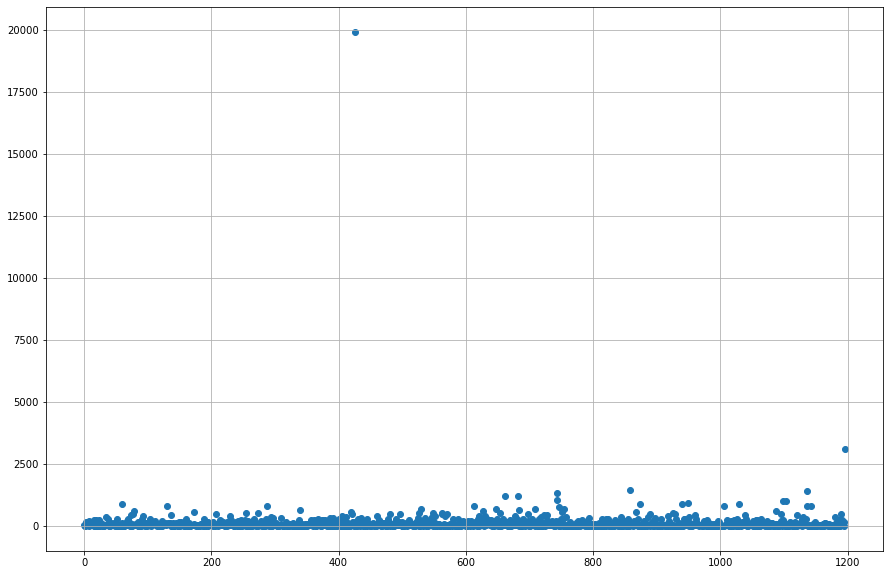

In [57]:
plt.scatter(x_values_orders, orders['revenue']) 
plt.grid()
plt.show()

Here we see that most of the orders have revenue beneath 2,500. We have only 2 orders that have higher revenue: one around 3,500-4,000 and one around 20,000.


* **8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [58]:
np.percentile(orders['revenue'], [95, 99])

array([435.54 , 900.904])

This means that no more than 5% of the orders cost more than 435.54 and no more than 1% cost more than 900.904. 

Thus we can set the limit for order price to be 435.54, and filter any order above that as abnormal.

* **9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**

Let's buils the right data set with the number of buyers for each group.

In [59]:
orders_buyers_A = orders_A.groupby('date')['visitorId'].nunique().reset_index()
orders_buyers_A.columns = ['date', 'buyers']
orders_buyers_A.head()

,date,buyers
0,2019-08-01,20
1,2019-08-02,19
2,2019-08-03,24
3,2019-08-04,15
4,2019-08-05,25


In [60]:
orders_buyers_B = orders_B.groupby('date')['visitorId'].nunique().reset_index()
orders_buyers_B.columns = ['date', 'buyers']
orders_buyers_B.head()

,date,buyers
0,2019-08-01,20
1,2019-08-02,23
2,2019-08-03,16
3,2019-08-04,16
4,2019-08-05,23


Now let's see how many trials and successes each group obtains.

In [61]:
A_trials = visits_A['visits'].sum()
print('-----Group A-----')
print("Trials:",A_trials)
A_successes = orders_buyers_A['buyers'].sum()
print("Successes:",A_successes)

-----Group A-----
Trials: 18736
Successes: 543


In [62]:
B_trials = visits_B['visits'].sum()
print('-----Group B-----')
print("Trials:",B_trials)
B_successes = orders_buyers_B['buyers'].sum()
print("Successes:",B_successes)

-----Group B-----
Trials: 18916
Successes: 628


Noe let's build a function to find the statistical significance.

In [63]:
def check_hypothesis(successes1,trials1, successes2,trials2, alpha=0.05):
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

Let's formulate the hypotheses.

**H0:** There's not a statistically significant difference in conversion between the groups.

**H1:** There's a statistically significant difference in conversion between the groups.

In [64]:
check_hypothesis(A_successes,A_trials, B_successes,B_trials, alpha=0.05)

p-value:  0.01840751744395841


We got a p-value that is smaller than 0.05 so we reject the null hypothesis and say that there is a statistically significant difference in conversion between the groups.

* **10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.**

Let's build the right data set for each group that contains the nubber of orders and the amount of revenue for each day to calculate the average order size.

In [65]:
orders_A_revenue = orders_A.groupby('date').agg({'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_A_revenue.columns = ['date', 'orders', 'revenue']
orders_A_revenue.head()

,date,orders,revenue
0,2019-08-01,24,2356.8
1,2019-08-02,20,1503.5
2,2019-08-03,24,1815.2
3,2019-08-04,16,1146.6
4,2019-08-05,25,1988.1


In [66]:
orders_B_revenue = orders_B.groupby('date').agg({'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_B_revenue.columns = ['date', 'orders', 'revenue']
orders_B_revenue.head()

,date,orders,revenue
0,2019-08-01,21,1620.0
1,2019-08-02,24,2623.8
2,2019-08-03,16,1806.8
3,2019-08-04,17,1717.3
4,2019-08-05,23,1495.0


Now let's calculate the average purchase size for each group.

In [67]:
orders_A_revenue['avg_ch'] = orders_A_revenue['revenue']/orders_A_revenue['orders']
orders_A_revenue.head()

,date,orders,revenue,avg_ch
0,2019-08-01,24,2356.8,98.200000
1,2019-08-02,20,1503.5,75.175000
2,2019-08-03,24,1815.2,75.633333
3,2019-08-04,16,1146.6,71.662500
4,2019-08-05,25,1988.1,79.524000


In [68]:
orders_B_revenue['avg_ch'] = orders_B_revenue['revenue']/orders_B_revenue['orders']
orders_B_revenue.head()

,date,orders,revenue,avg_ch
0,2019-08-01,21,1620.0,77.142857
1,2019-08-02,24,2623.8,109.325000
2,2019-08-03,16,1806.8,112.925000
3,2019-08-04,17,1717.3,101.017647
4,2019-08-05,23,1495.0,65.000000


Now let's build a function to find the statistical significance.

In [69]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

In [70]:
print('----Group A----')
orders_A_revenue['avg_ch'].mean()

----Group A----


116.47305191426933

In [71]:
print('----Group B----')
orders_B_revenue['avg_ch'].mean()

----Group B----


144.2254442859877

Let's formulate the hypotheses.

**H0:** There's not a difference in average order size between the groups.

**H1:** There's a difference in average order size between the groups.

In [72]:
testing_average(orders_A_revenue['avg_ch'],orders_B_revenue['avg_ch'],alpha=0.05)

0.4222761086468382
Fail to Reject H0


The p-value is greater than 0.05 so we can conclude that the average order size don't differs between the groups.

* **11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**

Let's define users who made orders greater than 435.54 or more than 3 orders as anomalous users. We will filter those users and then use the clean data set to find the statistical significance.

**Group A**

In [73]:
orders_A_user_price = orders_A.groupby('visitorId').agg({'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_A_user_price.columns = ['user', 'orders', 'revenue']
orders_A_user_price.head()

,user,orders,revenue
0,8300375,1,30.5
1,11685486,1,100.4
2,54447517,1,5.0
3,66685450,1,125.9
4,78758296,1,20.1


In [74]:
orders_A_user_price_clean = orders_A_user_price.query('orders <=3')
orders_A_user_price_clean = orders_A_user_price_clean.query('revenue <=435.54')
orders_A_user_price_clean.head()

,user,orders,revenue
0,8300375,1,30.5
1,11685486,1,100.4
2,54447517,1,5.0
3,66685450,1,125.9
4,78758296,1,20.1


In [75]:
orders_A_user_price_clean.sort_values(by='revenue', ascending = False).head(2)

,user,orders,revenue
342,2927087541,1,425.8
207,1831140265,1,410.5


In [76]:
orders_A_user_price_clean.sort_values(by='orders', ascending = False).head(2)

,user,orders,revenue
456,3908431265,3,71.4
146,1230306981,3,295.7


Great!

In [77]:
good_users_A = orders_A_user_price_clean['user']

In [78]:
orders_A_clean = orders_A[orders_A['visitorId'].isin(good_users_A)]
orders_A_clean.head()

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A


**Group B**

In [79]:
orders_B_user_price = orders_B.groupby('visitorId').agg({'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_B_user_price.columns = ['user', 'orders', 'revenue']
orders_B_user_price.head()

,user,orders,revenue
0,5114589,1,10.8
1,6958315,1,25.9
2,8300375,1,165.7
3,39475350,1,65.4
4,47206413,1,15.2


In [80]:
orders_B_user_price_clean = orders_B_user_price.query('orders <=3')
orders_B_user_price_clean = orders_B_user_price_clean.query('revenue <=435.54')
orders_B_user_price_clean.head()

,user,orders,revenue
0,5114589,1,10.8
1,6958315,1,25.9
2,8300375,1,165.7
3,39475350,1,65.4
4,47206413,1,15.2


In [81]:
orders_B_user_price_clean.sort_values(by='revenue', ascending = False).head(2)

,user,orders,revenue
218,1605520752,1,435.5
192,1404560065,2,431.5


In [82]:
orders_A_user_price_clean.sort_values(by='orders', ascending = False).head(2)

,user,orders,revenue
456,3908431265,3,71.4
146,1230306981,3,295.7


Nice!

In [83]:
good_users_B = orders_B_user_price_clean['user']

In [84]:
orders_B_clean = orders_B[orders_B['visitorId'].isin(good_users_B)]
orders_B_clean.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


Now, let's start with the calculation.

We can't clean the visits table, so we will leave it as is and use the new clean data sets and the original visits table for this calculation.

In [85]:
orders_buyers_A_clean = orders_A_clean.groupby('date')['visitorId'].nunique().reset_index()
orders_buyers_A_clean.columns = ['date', 'buyers']
orders_buyers_A_clean.head()

,date,buyers
0,2019-08-01,16
1,2019-08-02,17
2,2019-08-03,24
3,2019-08-04,12
4,2019-08-05,24


In [86]:
orders_buyers_B_clean = orders_B_clean.groupby('date')['visitorId'].nunique().reset_index()
orders_buyers_B_clean.columns = ['date', 'buyers']
orders_buyers_B_clean.head()

,date,buyers
0,2019-08-01,19
1,2019-08-02,21
2,2019-08-03,15
3,2019-08-04,15
4,2019-08-05,21


Let's see how many trials and successes each group obtains with the clean data.

In [87]:
A_trials = visits_A['visits'].sum()
print('-----Group A-----')
print("Trials:",A_trials)
A_successes_clean = orders_buyers_A_clean['buyers'].sum()
print("Successes_clean:",A_successes_clean)

-----Group A-----
Trials: 18736
Successes_clean: 479


In [88]:
B_trials = visits_A['visits'].sum()
print('-----Group B-----')
print("Trials:",B_trials)
B_successes_clean = orders_buyers_B_clean['buyers'].sum()
print("Successes_clean:",B_successes_clean)

-----Group B-----
Trials: 18736
Successes_clean: 568


First, let's formulate the hypotheses.

**H0:** There's not a statistically significant difference in conversion between the groups.

**H1:** There's a statistically significant difference in conversion between the groups.

Now we will use the function that we built earlier for the raw data.

In [89]:
check_hypothesis(A_successes_clean,A_trials, B_successes_clean,B_trials, alpha=0.05)

p-value:  0.005274348494124892


Here also we got a p-value that is smaller than 0.05,  so we reject the null hypothesis and say that there is a statistically significant difference in conversion between the groups. After cleaning the data the p-value got much smaller than it was in the raw data, so the statistically significant difference in conversion between the groups is much clearer in the clean data.

* **12. Find the statistical significance of the difference in average order size
between the groups using the filtered data. Make conclusions and conjectures.**


We will use the clean data sets that we created in the previous question to answer this one. 

First, let's create the right data set.

In [90]:
orders_A_revenue_clean = orders_A_clean.groupby('date').agg({'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_A_revenue_clean.columns = ['date', 'orders', 'revenue']
orders_A_revenue_clean.head()

,date,orders,revenue
0,2019-08-01,18,909.0
1,2019-08-02,17,827.4
2,2019-08-03,24,1815.2
3,2019-08-04,12,755.7
4,2019-08-05,24,1763.1


In [91]:
orders_B_revenue_clean = orders_B_clean.groupby('date').agg({'transactionId':'count', 'revenue':'sum'}).reset_index()
orders_B_revenue_clean.columns = ['date', 'orders', 'revenue']
orders_B_revenue_clean.head()

,date,orders,revenue
0,2019-08-01,19,1258.8
1,2019-08-02,22,1558.2
2,2019-08-03,15,1386.7
3,2019-08-04,16,1232.0
4,2019-08-05,21,1014.6


In [92]:
orders_A_revenue_clean['avg_ch'] = orders_A_revenue_clean['revenue']/orders_A_revenue_clean['orders']
orders_A_revenue_clean.head()

,date,orders,revenue,avg_ch
0,2019-08-01,18,909.0,50.500000
1,2019-08-02,17,827.4,48.670588
2,2019-08-03,24,1815.2,75.633333
3,2019-08-04,12,755.7,62.975000
4,2019-08-05,24,1763.1,73.462500


In [93]:
orders_B_revenue_clean['avg_ch'] = orders_B_revenue_clean['revenue']/orders_B_revenue_clean['orders']
orders_B_revenue_clean.head()

,date,orders,revenue,avg_ch
0,2019-08-01,19,1258.8,66.252632
1,2019-08-02,22,1558.2,70.827273
2,2019-08-03,15,1386.7,92.446667
3,2019-08-04,16,1232.0,77.000000
4,2019-08-05,21,1014.6,48.314286


Here also we will use the function that we built earlier to answer this question for the raw data.

In [94]:
print('----Group A----')
orders_A_revenue_clean['avg_ch'].mean()

----Group A----


81.18109704985675

In [95]:
print('----Group B----')
orders_B_revenue_clean['avg_ch'].mean()

----Group B----


80.98278301004788

Let's formulate the hypotheses.

**H0:** There's not a difference in average order size between the groups.

**H1:** There's a difference in average order size between the groups.

In [96]:
testing_average(orders_A_revenue_clean['avg_ch'],orders_B_revenue_clean['avg_ch'],alpha=0.05)

0.9103250189032224
Fail to Reject H0


Here also we got p-value greater than 0.05 so we can conclude that the average order size doesn't differs between the groups. 

* **13. Make a decision based on the test results. The possible decisions are:**
1.  **Stop the test, consider one of the groups the leader.**
2.  **Stop the test, conclude that there is no difference between the groups.**
3.  **Continue the test.**

All the metrics and tests showed that the performance of group B is better than group A. The graphs also supported this conclusion. The statistical significance of the conversion rate showed us that there are differences between the groups, while the statistical significance of the average order size doesn't differentiate between the groups. The conversion rate of group B is greater than group A but the average order size doesn't. This means that users in group B buy in the same amount, but there are more users in group B that actually make a purchase.

Thus we can recommend stopping the test because it's clear that group B is the leader and has better performance than group A. The marketing department can apply the characteristics of group B to boost the store's revenue.

Biana.